### Import Libraries

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load Dataset

In [130]:
df = pd.read_csv("https://raw.githubusercontent.com/Danazzz/beras-scm/main/csv/Beras.csv")
df

,Tanggal,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Harga Beras Penggilingan,Produksi Beras,Harga Beras,UMP,BBM Solar,Tingkat Konsumsi
0,2021-03-15,10,4000,4150,5050,9465,14419,11200,4960,9600,17161
1,2021-03-16,10,3850,4100,4740,9360,14419,11200,4960,9600,17161
2,2021-03-17,10,4160,4230,4950,9400,14419,11200,4960,9600,17161
3,2021-03-18,10,4120,4190,4730,9340,14419,11200,4960,9600,17161
4,2021-03-19,10,4190,4290,4990,9410,14419,11200,4960,9600,17161
...,...,...,...,...,...,...,...,...,...,...,...
673,2023-12-21,30,6770,6850,7980,13100,14391,14000,5444,6800,17598
674,2023-12-22,30,6600,6760,8050,13095,14391,14000,5444,6800,17598
675,2023-12-27,30,6620,6760,8030,13120,14391,14000,5444,6800,17598
676,2023-12-28,30,6650,6760,8020,13120,14391,14000,5444,6800,17598


### Preprocessing

In [131]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df['Year'] = df['Tanggal'].dt.year
df['Month'] = df['Tanggal'].dt.month

In [132]:
df = df.set_index('Tanggal')
df = df[['Harga Beras']]
df.head()

,Harga Beras
Tanggal,
2021-03-15,11200
2021-03-16,11200
2021-03-17,11200
2021-03-18,11200
2021-03-19,11200


In [133]:
from sklearn.preprocessing import MinMaxScaler
#normalize
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
#split data
train_size = int(len(df_scaled) * 0.8)
train_data, test_data = df_scaled[:train_size], df_scaled[train_size:]


In [134]:
def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range (len(data) - sequence_length):
        x.append(data[i:(i + sequence_length), 0])
        y.append(data[i + sequence_length, 0])
    return np.array(x), np.array(y)
sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [135]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=150, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss ='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50


2024-05-12 03:53:35.447696: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-12 03:53:35.448495: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-12 03:53:35.449346: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

9/9 [==============================] - 2s 13ms/step - loss: 0.0217
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0027
Epoch 3/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0013
Epoch 4/50
9/9 [==============================] - 0s 16ms/step - loss: 6.6897e-04
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 6.0027e-04
Epoch 6/50
9/9 [==============================] - 0s 15ms/step - loss: 4.7470e-04
Epoch 7/50
9/9 [==============================] - 0s 18ms/step - loss: 4.4438e-04
Epoch 8/50
9/9 [==============================] - 0s 19ms/step - loss: 4.0314e-04
Epoch 9/50
9/9 [==============================] - 0s 18ms/step - loss: 4.0284e-04
Epoch 10/50
9/9 [==============================] - 0s 17ms/step - loss: 4.0408e-04
Epoch 11/50
9/9 [==============================] - 0s 24ms/step - loss: 3.9797e-04
Epoch 12/50
9/9 [==============================] - 0s 17ms/step - loss: 3.9150e-04
Epoch 13/50
9/9 [===================

2024-05-12 03:53:44.572665: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-12 03:53:44.573281: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-12 03:53:44.574018: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

4/4 [==============================] - 0s 4ms/step
Mean Squared Error: 101625.02750616982


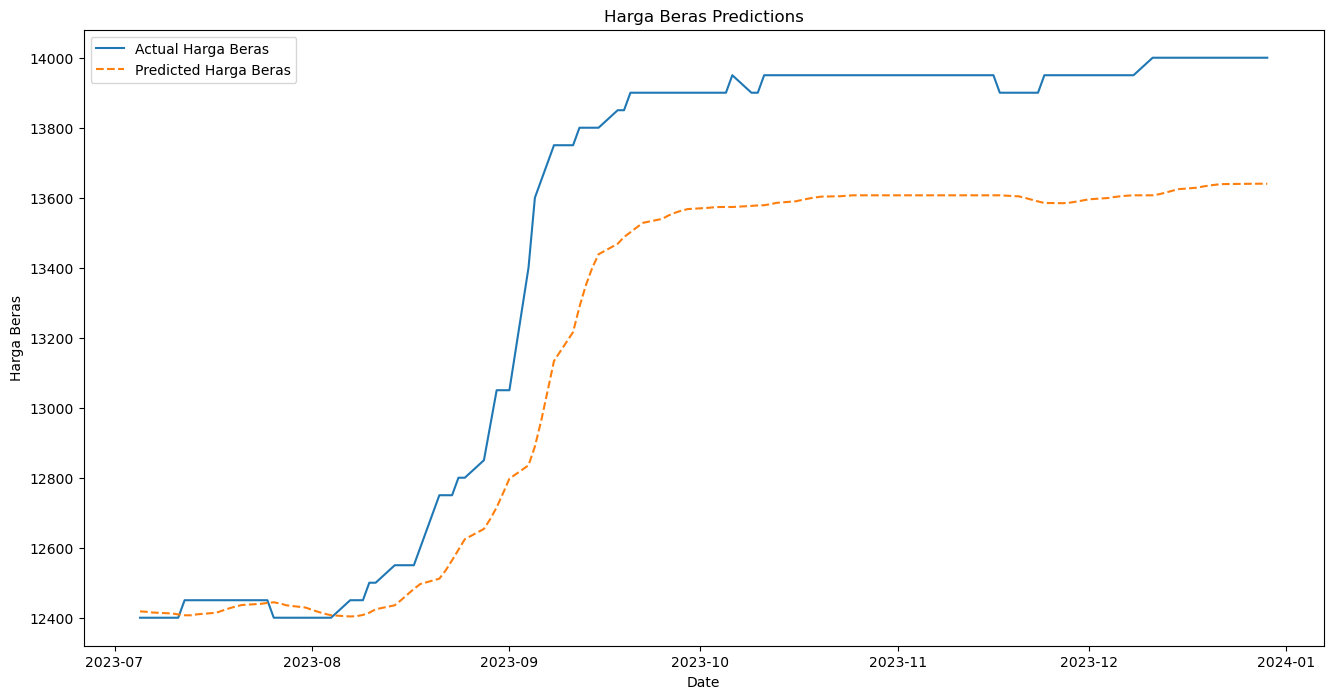

In [136]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df[-len(predictions):]["Harga Beras"], predictions)
print(f'Mean Squared Error: {mse}')
#plot
plt.figure(figsize=(16,8))
plt.plot(df.index[-len(predictions):], df[-len(predictions):]["Harga Beras"], label = "Actual Harga Beras")
plt.plot(df.index[-len(predictions):], predictions, label = "Predicted Harga Beras", linestyle='dashed')
plt.title('Harga Beras Predictions')
plt.xlabel('Date')
plt.ylabel('Harga Beras')
plt.legend()
plt.show()

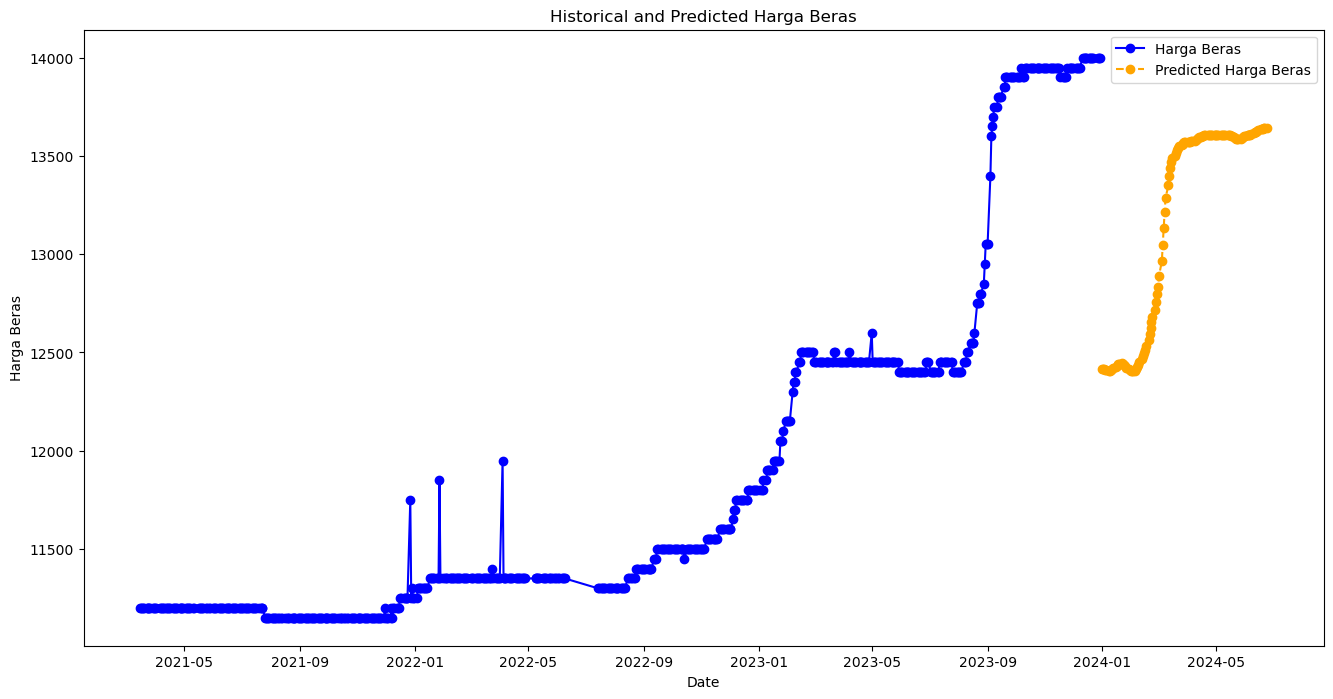

In [137]:
Beras_column = 'Harga Beras'

plt.figure(figsize=(16,8))
plt.plot(df.index, df[Beras_column], label='Harga Beras', marker='o', linestyle='-', color='b')

predicted_dates = pd.date_range(start=df.index[-1], periods=len(predictions)+1, freq='B')[1:]
plt.plot(predicted_dates, predictions, label='Predicted Harga Beras', marker='o', linestyle='dashed', color='orange')
plt.title('Historical and Predicted Harga Beras')
plt.xlabel('Date')
plt.ylabel('Harga Beras')
plt.legend()
plt.show()

In [138]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'target' is your target variable
target = df['Harga Beras']

# Create a scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the target and transform the target
scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

# Define the number of time steps
time_steps = 90
# Get the last known window of data
input_data = scaled_target[-time_steps:]

# Reshape it to [samples, time_steps, n_features]
input_data = input_data.reshape((1, time_steps, 1))

# Initialize a list to hold the predictions
predictions = []

# Forecast for the next 90 days
for _ in range(90):
    # Make a prediction
    pred = model.predict(input_data)
    
    # Append the prediction to the list
    predictions.append(pred[0, 0])
    
    # Use the prediction as an input for the next prediction
    input_data = np.append(input_data[0, 1:], pred)
    input_data = input_data.reshape((1, time_steps, 1))

# Invert scaling for forecast
inv_predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Print the predictions
print(inv_predictions)

2024-05-12 03:53:45.169446: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-12 03:53:45.170701: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-12 03:53:45.171520: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 14ms/step
[[13694.984 ]
 [13676.782 ]
 [13649.037 ]
 [13616.054 ]
 [13580.966 ]
 [13545.8   ]
 [13511.742 ]
 [13479.413 ]
 [13449.0625]
 [13420.725 ]
 [13394.318 ]
 [13369.705 ]
 [13346.733 ]
 [13325.255 ]
 [13305.133 ]
 [13286.245 ]
 [13268.486 ]
 [13251.763 ]
 [13235.992 ]
 [13221.104 ]
 [13207.034 ]
 [13193.725 ]
 [13181.125 ]
 [13169.1875]
 [13157.867 ]
 [13147.13  ]
 [13136.937 ]
 [13127.255 ]
 [13118.053 ]
 [13109.306 ]
 [13100.982 ]
 [13093.06  ]
 [13085.518 ]
 [13078.333 ]
 [13071.487 ]
 [13064.962 ]
 [13058.737 ]
 [13052.8   ]
 [13047.133 ]
 [13041.725 ]
 [13036.561 ]
 [13031.627 ]
 [13026.914 ]
 [13022.41  ]
 [13018.105 ]
 [13013.988 ]
 [13010.052 ]
 [13006.286 ]
 [13002.684 ]
 [12999.235 ]
 [12995.936 ]
 [12992.776 ]
 [12989.751 ]
 [12986.855 ]
 [12984.08  ]
 [12981.422 ]
 [12978.877 ]
 [12976.436 ]
 [12974.099 ]
 [12971.856 ]
 [12969.708 ]
 [12967.648 ]
 [12965.674 ]
 [12963.779 ]
 [12961.964 ]
 [12960.222 ]
 [12958.55  ]
 [12956.94

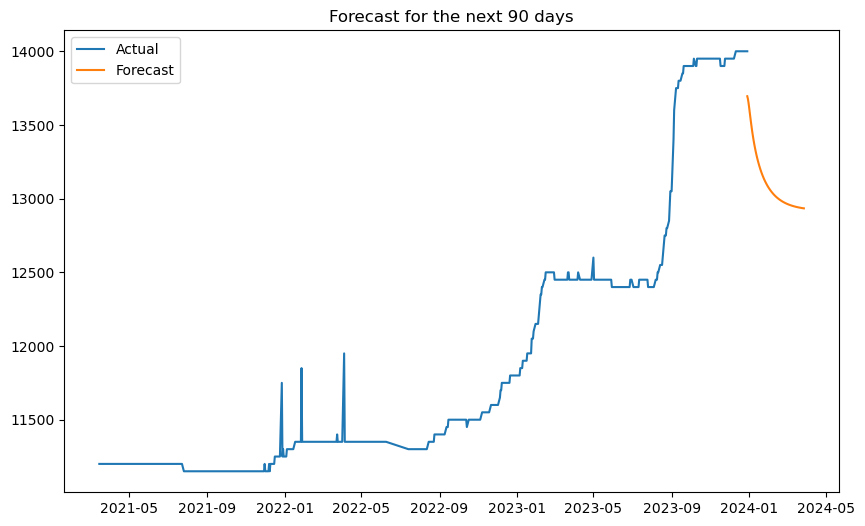

In [139]:
import matplotlib.pyplot as plt

# Create a range of future dates
future_dates = pd.date_range(start=df.index[-1], periods=90)

# Convert predictions to a DataFrame
forecast = pd.DataFrame(inv_predictions, index=future_dates, columns=['Forecast'])

# Plot the actual data
plt.figure(figsize=(10,6))
plt.plot(df['Harga Beras'], label='Actual')

# Plot the forecast
plt.plot(forecast['Forecast'], label='Forecast')

plt.title('Forecast for the next 90 days')
plt.legend()
plt.show()

In [140]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

rmse = sqrt(mean_squared_error(df[-len(predictions):]["Harga Beras"], predictions))
mae = mean_absolute_error(df[-len(predictions):]["Harga Beras"], predictions)
print("Root Mean Square Error:", rmse)
print("Mean Absolute Error:", mae)

# R Square
r = r2_score(df[-len(predictions):]["Harga Beras"], predictions)

# Mean Square Error
mse = mean_squared_error(df[-len(predictions):]["Harga Beras"], predictions)

# Menampilkan hasil
print("R Square: {:.4f}".format(r))
print("Mean Square Error:", mse)

Root Mean Square Error: 13840.463296539921
Mean Absolute Error: 13837.64783464008
R Square: -2458.2929
Mean Square Error: 191558424.2628687


In [141]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

# Function to create dataset for LSTM training
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        a = data[i:(i + look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Scale the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Split data into training and test sets
look_back = 14  # number of days to look back for prediction
X, Y = create_dataset(df_scaled, look_back)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

# Split into train and test sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
trainX, testX = X[0:train_size], X[train_size:len(X)]
trainY, testY = Y[0:train_size], Y[train_size:len(Y)]

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(df_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(df_scaled) - 1, :] = testPredict

# Prepare to predict the next 90 days
last_batch = df_scaled[-look_back:]
last_batch = last_batch.reshape((1, 1, look_back))
forecast = []
for _ in range(90):
    current_pred = model.predict(last_batch)
    forecast.append(current_pred[0][0])
    last_batch = np.append(last_batch[0][0][1:], current_pred[0][0]).reshape(1, 1, look_back)

# Inverse scale forecast
forecast = scaler.inverse_transform([forecast])

forecast


2024-05-12 16:20:57.839389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-12 16:20:57.841522: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-12 16:20:57.842802: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2024-05-12 16:20:58.235503: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-12 16:20:58.236734: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-12 16:20:58.237744: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

444/444 - 1s - loss: 0.0014 - 1s/epoch - 3ms/step
Epoch 2/100
444/444 - 0s - loss: 4.9864e-04 - 306ms/epoch - 688us/step
Epoch 3/100
444/444 - 0s - loss: 4.9507e-04 - 293ms/epoch - 660us/step
Epoch 4/100
444/444 - 0s - loss: 5.0358e-04 - 304ms/epoch - 684us/step
Epoch 5/100
444/444 - 0s - loss: 4.7471e-04 - 256ms/epoch - 576us/step
Epoch 6/100
444/444 - 0s - loss: 4.4967e-04 - 259ms/epoch - 583us/step
Epoch 7/100
444/444 - 0s - loss: 4.5760e-04 - 312ms/epoch - 704us/step
Epoch 8/100
444/444 - 0s - loss: 4.2998e-04 - 288ms/epoch - 650us/step
Epoch 9/100
444/444 - 0s - loss: 4.1086e-04 - 337ms/epoch - 760us/step
Epoch 10/100
444/444 - 0s - loss: 4.2766e-04 - 284ms/epoch - 640us/step
Epoch 11/100
444/444 - 0s - loss: 4.4552e-04 - 281ms/epoch - 632us/step
Epoch 12/100
444/444 - 0s - loss: 4.0062e-04 - 272ms/epoch - 613us/step
Epoch 13/100
444/444 - 0s - loss: 4.0721e-04 - 227ms/epoch - 512us/step
Epoch 14/100
444/444 - 0s - loss: 3.8957e-04 - 219ms/epoch - 492us/step
Epoch 15/100
444/444 -

2024-05-12 16:21:25.394603: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-12 16:21:25.395589: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-12 16:21:25.396677: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

ValueError: could not broadcast input array from shape (220,1) into shape (204,1)

In [142]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Function to convert series to supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# Parameters
n_days_in, n_days_out = 14, 90  # Number of input days and output days for prediction

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

# Frame as supervised learning
reframed = series_to_supervised(scaled_data, n_days_in, n_days_out)
reframed_values = reframed.values

# Split into train and test sets (use last 90 days for testing)
n_train_days = len(reframed_values) - n_days_out
train = reframed_values[:n_train_days, :]
test = reframed_values[n_train_days:, :]

# Split into input and outputs
train_X, train_y = train[:, :-n_days_out], train[:, -n_days_out:]
test_X, test_y = test[:, :-n_days_out], test[:, -n_days_out:]

# Reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_days_in, 1))
test_X = test_X.reshape((test_X.shape[0], n_days_in, 1))

# Design LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(n_days_out))
model.compile(loss='mae', optimizer='adam')

# Fit network
model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Epoch 1/50


2024-05-12 16:22:21.203981: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-12 16:22:21.204979: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-12 16:22:21.205857: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7/7 - 2s - loss: 0.1529 - val_loss: 0.6742 - 2s/epoch - 227ms/step
Epoch 2/50
7/7 - 0s - loss: 0.1454 - val_loss: 0.6537 - 69ms/epoch - 10ms/step
Epoch 3/50


2024-05-12 16:22:22.796941: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-12 16:22:22.797766: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-12 16:22:22.798726: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7/7 - 0s - loss: 0.1358 - val_loss: 0.6210 - 54ms/epoch - 8ms/step
Epoch 4/50
7/7 - 0s - loss: 0.1204 - val_loss: 0.5565 - 71ms/epoch - 10ms/step
Epoch 5/50
7/7 - 0s - loss: 0.1010 - val_loss: 0.4512 - 51ms/epoch - 7ms/step
Epoch 6/50
7/7 - 0s - loss: 0.0901 - val_loss: 0.3432 - 78ms/epoch - 11ms/step
Epoch 7/50
7/7 - 0s - loss: 0.0849 - val_loss: 0.2819 - 52ms/epoch - 7ms/step
Epoch 8/50
7/7 - 0s - loss: 0.0745 - val_loss: 0.2577 - 53ms/epoch - 8ms/step
Epoch 9/50
7/7 - 0s - loss: 0.0673 - val_loss: 0.2259 - 70ms/epoch - 10ms/step
Epoch 10/50
7/7 - 0s - loss: 0.0630 - val_loss: 0.2349 - 57ms/epoch - 8ms/step
Epoch 11/50
7/7 - 0s - loss: 0.0610 - val_loss: 0.2373 - 49ms/epoch - 7ms/step
Epoch 12/50
7/7 - 0s - loss: 0.0590 - val_loss: 0.2324 - 64ms/epoch - 9ms/step
Epoch 13/50
7/7 - 0s - loss: 0.0587 - val_loss: 0.2415 - 52ms/epoch - 7ms/step
Epoch 14/50
7/7 - 0s - loss: 0.0573 - val_loss: 0.2395 - 48ms/epoch - 7ms/step
Epoch 15/50
7/7 - 0s - loss: 0.0562 - val_loss: 0.2368 - 55ms/epoch

In [144]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your dataset
df = pd.read_csv('../../csv/Beras.csv')
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df = df.set_index('Tanggal')
df = df[['Harga Beras']]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

# Prepare data for LSTM
reframed = series_to_supervised(scaled_data, 14, 90)
train_X, train_y = train[:, :-90], train[:, -90:]

# Reshape input to be [samples, time steps, features]
train_X = train_X.reshape((train_X.shape[0], 14, 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(14, 1)))
model.add(Dense(90))
model.compile(loss='mae', optimizer='adam')

# Fit model
model.fit(train_X, train_y, epochs=50, batch_size=72, verbose=2)


Epoch 1/50


2024-05-12 16:23:35.852316: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-12 16:23:35.853365: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-12 16:23:35.854407: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7/7 - 1s - loss: 0.1519 - 944ms/epoch - 135ms/step
Epoch 2/50
7/7 - 0s - loss: 0.1400 - 36ms/epoch - 5ms/step
Epoch 3/50
7/7 - 0s - loss: 0.1237 - 33ms/epoch - 5ms/step
Epoch 4/50
7/7 - 0s - loss: 0.1034 - 37ms/epoch - 5ms/step
Epoch 5/50
7/7 - 0s - loss: 0.0779 - 33ms/epoch - 5ms/step
Epoch 6/50
7/7 - 0s - loss: 0.0683 - 31ms/epoch - 4ms/step
Epoch 7/50
7/7 - 0s - loss: 0.0606 - 35ms/epoch - 5ms/step
Epoch 8/50
7/7 - 0s - loss: 0.0553 - 33ms/epoch - 5ms/step
Epoch 9/50
7/7 - 0s - loss: 0.0503 - 34ms/epoch - 5ms/step
Epoch 10/50
7/7 - 0s - loss: 0.0481 - 31ms/epoch - 4ms/step
Epoch 11/50
7/7 - 0s - loss: 0.0463 - 31ms/epoch - 4ms/step
Epoch 12/50
7/7 - 0s - loss: 0.0462 - 37ms/epoch - 5ms/step
Epoch 13/50
7/7 - 0s - loss: 0.0450 - 32ms/epoch - 5ms/step
Epoch 14/50
7/7 - 0s - loss: 0.0442 - 37ms/epoch - 5ms/step
Epoch 15/50
7/7 - 0s - loss: 0.0437 - 37ms/epoch - 5ms/step
Epoch 16/50
7/7 - 0s - loss: 0.0435 - 32ms/epoch - 5ms/step
Epoch 17/50
7/7 - 0s - loss: 0.0431 - 36ms/epoch - 5ms/st

In [145]:
import matplotlib.pyplot as plt

# Assuming 'predictions' are your model's output and 'actuals' are the true values
# Also assuming you have applied inverse transformation to both, and they are numpy arrays

# Create a time index for plotting, continuing from the last date in your dataset
dates = pd.date_range(start=df.index[-1], periods=len(predictions) + 1, freq='D')[1:]

# Create a DataFrame for easy plotting
results = pd.DataFrame({
    'Actual': actuals.flatten(),  # Flatten in case the data is in a different shape
    'Predicted': predictions.flatten()
}, index=dates)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(results['Actual'], label='Actual Harga Beras', color='blue')
plt.plot(results['Predicted'], label='Predicted Harga Beras', color='red')
plt.title('Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Harga Beras')
plt.legend()
plt.show()


NameError: name 'actuals' is not defined